<h1 align='center'><b><font color='indianred'></p>Spam Detection HW</b></h1>

<font color = 'indianred' size = 4 >**Read complete instructions before starting the HW** </font>


# <font color='indianred'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe.

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





In [1]:
import sys
if 'google.colab' in str(get_ipython()):
    from google.colab import files

    uploaded = files.upload()

    for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.

    !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download "uciml/sms-spam-collection-dataset"
    !unzip sms-spam-collection-dataset.zip

In [2]:
import pandas as pd
if 'google.colab' in str(get_ipython()):
    spam_df = pd.read_csv('spam.csv', encoding='latin-1')
else:
    spam_df = pd.read_csv('/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Data_Folder/spam.csv', encoding='latin-1')
spam_df = spam_df[['v1','v2']]
spam_df.columns = ['label', 'message']
spam_df.head()

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_3762/1337418617.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
spam_df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [4]:
spam_df['label'].value_counts(normalize=True)*100

label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

In [5]:
spam_df['label'].replace({'ham':0, 'spam':1}, inplace=True)

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_3762/1359867004.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spam_df['label'].replace({'ham':0, 'spam':1}, inplace=True)
/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_3762/1359867004.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

In [6]:
spam_df['label'].value_counts(normalize=True)*100

label
0    86.593683
1    13.406317
Name: proportion, dtype: float64

# <font color='indianred'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

<h3>Using F1 Score for the minority class would help us. As it provides balance between Precision and recall.</h3>

# <font color='indianred'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model.

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 5-10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:**

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/).

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.).

4. Think carefully about the pre-processing you will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn:

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**

In [7]:
spam_df_small = spam_df.sample(frac=0.05).reset_index(drop=True)
spam_df_small.head()

,label,message
0,0,I get out of class in bsn in like &lt;#&gt; ...
1,0,The evo. I just had to download flash. Jealous?
2,0,Wat makes some people dearer is not just de ha...
3,0,I will reach before ten morning
4,1,PRIVATE! Your 2004 Account Statement for 07742...


In [8]:
spam_df_small['label'].value_counts(normalize=True)*100

label
0    89.247312
1    10.752688
Name: proportion, dtype: float64

`df.sample` was able to create a stratified sample without specificying. If this wasn't the case I would try using methods mention in this [article](https://www.statology.org/stratified-sampling-pandas/).

In [9]:
import sklearn
from sklearn.model_selection import train_test_split
X = spam_df_small['message'].values
y = spam_df_small['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,shuffle=True)
print(X_train[:5])
print(y_train[:5])
print(X_test[:5])
print(y_test[:5])

["K I'll be there before 4."
 "That means from february to april i'll be getting a place to stay down there so i don't have to hustle back and forth during audition season as i have since my sister moved away from harlem."
 'Its not that time of the month nor mid of the time?'
 'Sir Goodmorning, Once free call me.'
 'Hello, hello, hi lou sorry it took so long 2 reply- I left mobile at friends in Lancaster, just got it bak Neway im sorry I couldnåÕt make ur båÕday 2 hun!']
[0 0 0 0 0]
['Text her. If she doesnt reply let me know so i can have her log in'
 'I tot u outside cos darren say u come shopping. Of course we nice wat. We jus went sim lim look at mp3 player.'
 'My sister cleared two round in birla soft yesterday.'
 'If he started searching he will get job in few days.he have great potential and talent.'
 "I've reached sch already..."]
[0 0 0 0 0]


In [10]:
import sys
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

    !pip install -U nltk -qq
    !pip install -U spacy -qq
    !pip install -U scikit-optimize -qq
    !python -m spacy download en_core_web_sm -qq
    !pip install pyspellchecker -qq
    !pip install optuna -qq

    basepath = '/content/drive/MyDrive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing'
    sys.path.append('/content/drive/MyDrive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Custom_files')
else:
    basepath = '/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/'
    sys.path.append(
        '/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Custom_files')

In [11]:
from pathlib import Path
base_folder = Path(basepath)
data_folder = base_folder/'0_Data_Folder'
model_folder = base_folder/'models/spam'
custom_functions = base_folder/'custom-functions'

In [12]:
import CustomPreprocessorSpacy as cp
from FeaturizerSpacy_w_SpellChecker import ManualFeatures
from plot_learning_curve import plot_learning_curve

In [13]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [14]:
disabled = nlp.select_pipes(
    disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'])


def spacy_tokenizer(data):
    doc = nlp(data)
    return [token.text for token in doc]

In [15]:
cpp = cp.SpacyPreprocessor(model = 'en_core_web_sm', batch_size=500)

def spacy_preprocessor(data):
    text = cpp.transform(data)
    return " ".join(text)

In [16]:
X_train_cleaned_bow = cpp.transform(X_train)
X_test_cleaned_bow = cpp.transform(X_test)

/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Custom_files/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [17]:
# Import the joblib library for saving and loading models
import joblib
import os

file_X_train_cleaned_bow = data_folder / 'x_train_cleaned_bow_small.pkl'
os.makedirs(os.path.dirname(file_X_train_cleaned_bow), exist_ok=True)
joblib.dump(X_train_cleaned_bow, file_X_train_cleaned_bow)

file_X_test_cleaned_bow = data_folder / 'x_test_cleaned_bow_small.pkl'
os.makedirs(os.path.dirname(file_X_test_cleaned_bow), exist_ok=True)
joblib.dump(X_test_cleaned_bow, file_X_test_cleaned_bow)

['/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Data_Folder/x_test_cleaned_bow_small.pkl']

In [18]:
import numpy as np
unique, counts = np.unique(y_train,return_counts=True)
print(dict(zip(unique, counts/sum(counts))))

{0: 0.8923766816143498, 1: 0.10762331838565023}


In [19]:
weights = dict(zip(unique[::-1], counts/sum(counts)))
weights

{1: 0.8923766816143498, 0: 0.10762331838565023}

In [20]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score

def objective(trial):
    # Define the hyperparameters to search over
    max_features = trial.suggest_int('max_features', 100, 10000)
    C = trial.suggest_loguniform('C', 1e-5, 100)
    weight = trial.suggest_float('weight', 0.1, 0.9)

    class_weight = {0: 1 - weight, 1: weight}

    # Create a pipeline with the current set of hyperparameters
    classifier_1 = Pipeline([
        ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+", max_features=max_features)),
        ('classifier', LogisticRegression(max_iter=10000, C=C, class_weight=class_weight))
    ])

    # Use cross-validation to evaluate the classifier with the current hyperparameters
    # Use f1_score as the scoring metric
    scores = cross_val_score(classifier_1, X_train, y_train, cv=5, scoring=make_scorer(f1_score, pos_label=1))
    return scores.mean()

/opt/homebrew/anaconda3/envs/nlp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-02-10 02:31:24,979] A new study created in memory with name: no-name-6395054c-b8c7-4c26-9f1c-ef2edc3dea02
/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_3762/3743568161.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 100)
[I 2024-02-10 02:31:25,118] Trial 0 finished with value: 0.0 and parameters: {'max_features': 7398, 'C': 0.012983161873193686, 'weight': 0.540334580615672}. Best is trial 0 with value: 0.0.
/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_3762/3743568161.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 100)
[I 2024-02-10 02:31:25,233] 

In [22]:
# Get the best hyperparameters found by Optuna
best_max_features = study.best_params['max_features']
best_C = study.best_params['C']
best_weight = study.best_params['weight']

In [23]:
study.best_params

{'max_features': 2760, 'C': 87.83019966457887, 'weight': 0.8979397330308629}

In [24]:
study.best_value

0.8825396825396826

In [25]:
best_classifier_1 = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+", max_features=best_max_features)),
    ('classifier', LogisticRegression(max_iter=10000, C=best_C,class_weight={0: 1 - best_weight, 1: best_weight}))
])

In [26]:
best_classifier_1.fit(X_train_cleaned_bow, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=2760, token_pattern='[\\S]+')),
                ('classifier',
                 LogisticRegression(C=87.83019966457887,
                                    class_weight={0: 0.10206026696913706,
                                                  1: 0.8979397330308629},
                                    max_iter=10000))])

In [27]:
print(f'Best cross-validation score: {study.best_value:.2f}')
print("\nBest parameters: ", study.best_params)
print("\nBest estimator: ", best_classifier_1)

Best cross-validation score: 0.88

Best parameters:  {'max_features': 2760, 'C': 87.83019966457887, 'weight': 0.8979397330308629}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=2760, token_pattern='[\\S]+')),
                ('classifier',
                 LogisticRegression(C=87.83019966457887,
                                    class_weight={0: 0.10206026696913706,
                                                  1: 0.8979397330308629},
                                    max_iter=10000))])


In [28]:
study.__dict__

{'study_name': 'no-name-6395054c-b8c7-4c26-9f1c-ef2edc3dea02',
 '_study_id': 0,
 '_storage': <optuna.storages._in_memory.InMemoryStorage at 0x295505c10>,
 '_directions': [<StudyDirection.MAXIMIZE: 2>],
 'sampler': <optuna.samplers._tpe.sampler.TPESampler at 0x29536cbd0>,
 'pruner': <optuna.pruners._median.MedianPruner at 0x2a0297a50>,
 '_thread_local': <optuna.study.study._ThreadLocalStudyAttribute at 0x2a193e990>,
 '_stop_flag': False}

<module 'matplotlib.pyplot' from '/opt/homebrew/anaconda3/envs/nlp/lib/python3.11/site-packages/matplotlib/pyplot.py'>

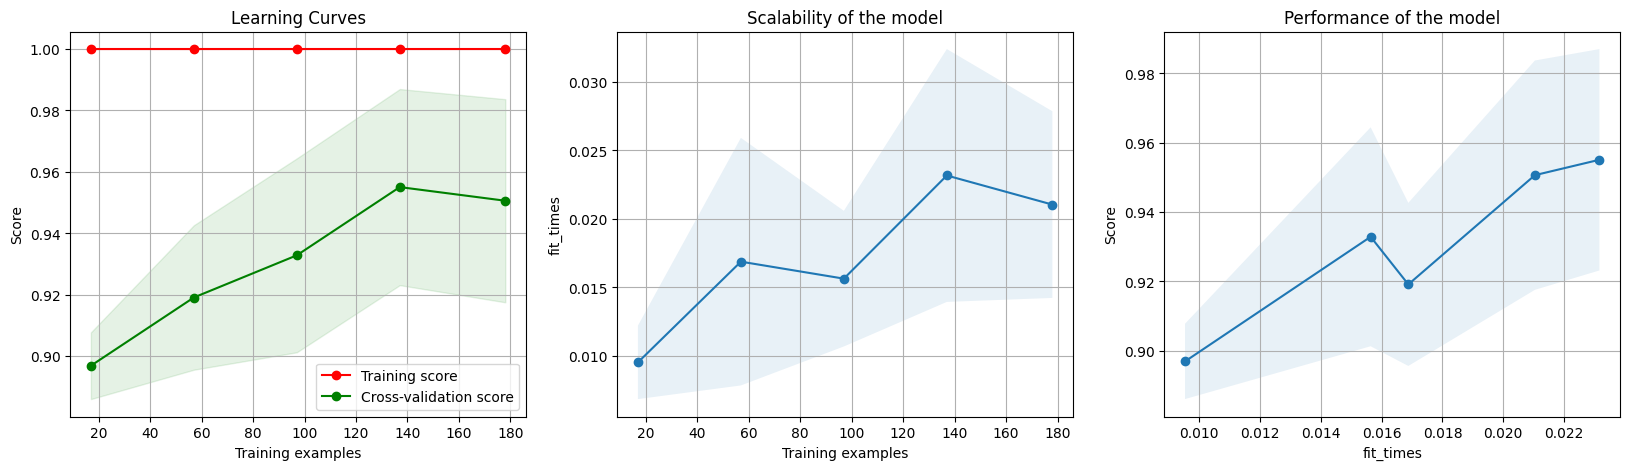

In [29]:
plot_learning_curve(best_classifier_1, 'Learning Curves',
                    X_train_cleaned_bow, y_train, n_jobs=-1)

In [30]:
def final_pipeline(pipeline,cleaned_text):
    predictions = pipeline.predict(cleaned_text)
    return predictions
y_test_pred = final_pipeline(best_classifier_1,X_test_cleaned_bow)

In [31]:
import sklearn.metrics as metrics
print('\nTest set classification report:\n\n',
      metrics.classification_report(y_test, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.67      0.80         6

    accuracy                           0.96        56
   macro avg       0.98      0.83      0.89        56
weighted avg       0.97      0.96      0.96        56



In [32]:
X_train_cleaned_basic = cp.SpacyPreprocessor(model='en_core_web_sm',
                                                    lemmatize=False, lower=False,
                                                    remove_stop=False, remove_punct=False,
                                                    remove_email=False, remove_url=False,
                                                     add_user_mention_prefix=False,
                                                     basic_clean_only=True).transform(X_train)

/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Custom_files/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [33]:
# save  this to a file
file_X_train_cleaned_basic = data_folder / 'x_train_cleaned_basic_small.pkl'
joblib.dump(X_train_cleaned_basic, file_X_train_cleaned_basic)

['/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Data_Folder/x_train_cleaned_basic_small.pkl']

In [34]:
X_test_cleaned_basic = cp.SpacyPreprocessor(model='en_core_web_sm',
                                                    lemmatize=False, lower=False,
                                                    remove_stop=False, remove_punct=False,
                                                    remove_email=False, remove_url=False,
                                                     add_user_mention_prefix=False,
                                                     basic_clean_only=True).transform(X_test)
file_X_test_cleaned_basic = data_folder / 'x_test_cleaned_basic_small.pkl'
joblib.dump(X_test_cleaned_basic, file_X_test_cleaned_basic)

['/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Data_Folder/x_test_cleaned_basic_small.pkl']

In [35]:
featurizer = ManualFeatures(spacy_model='en_core_web_sm', batch_size = 1000)

In [36]:
ManualFeatures??

Init signature:
ManualFeatures(
    spacy_model,
    batch_size=64,
    pos_features=True,
    ner_features=True,
    text_descriptive_features=True,
    spell_check=True,
)
Source:        
class ManualFeatures(TransformerMixin, BaseEstimator):

    """
    A custom transformer that extracts manual features from text using spaCy. It integrates well into scikit-learn
    pipelines and offers a variety of text features including Part-of-Speech (POS) tags, Named Entity Recognition (NER) tags,
    and basic text descriptive statistics.

    Attributes:
        spacy_model (str): The spaCy language model to be used for tokenization and other NLP tasks.
        batch_size (int): The number of documents to process at once during spaCy's pipeline processing.
        pos_features (bool): If True, extract POS tag features.
        ner_features (bool): If True, extract NER tag features.
        text_descriptive_features (bool): If True, extract basic text descriptive features such as word count, 

In [37]:
X_train_features, feature_names = featurizer.fit_transform(X_train_cleaned_basic)

In [38]:
X_train_features[0:3]

array([[  7.        ,  25.        ,  20.        ,   2.5       ,
          1.        ,   1.        ,   1.        ,   2.        ,
          0.        ,   0.        ,   1.        ],
       [ 39.        , 190.        , 154.        ,   3.85      ,
          0.        ,   1.        ,   7.        ,   4.        ,
          6.        ,   0.        ,   1.        ],
       [ 12.        ,  51.        ,  40.        ,   3.07692308,
          0.        ,   1.        ,   3.        ,   0.        ,
          0.        ,   1.        ,   0.        ]])

In [39]:
feature_names

['count_words',
 'count_characters',
 'count_characters_no_space',
 'avg_word_length',
 'count_numbers',
 'count_sentences',
 'spelling_errors',
 'noun_count',
 'aux_count',
 'verb_count',
 'adj_count',
 'ner']

In [40]:
classifier_2 = Pipeline([
    ('classifier', LogisticRegression(max_iter=10000)),
])

In [41]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score

def objective(trial):
    # Define the hyperparameters to search over
    C = trial.suggest_loguniform('C', 1e-5, 100)
    weight = trial.suggest_float('weight', 0.1, 0.9)

    class_weight = {0: 1 - weight, 1: weight}

    # Create a pipeline with the current set of hyperparameters
    classifier_1 = Pipeline([
        ('classifier', LogisticRegression(max_iter=10000, C=C, class_weight=class_weight))
    ])

    # Use cross-validation to evaluate the classifier with the current hyperparameters
    # Use f1_score as the scoring metric
    scores = cross_val_score(classifier_1, X_train_features, y_train, cv=5, scoring=make_scorer(f1_score, pos_label=1))
    return scores.mean()

In [42]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-02-10 02:32:27,632] A new study created in memory with name: no-name-59a19a7c-51c4-49c3-b319-44ca31c19fe3
/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_3762/2325454625.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 100)
[I 2024-02-10 02:32:27,744] Trial 0 finished with value: 0.7880952380952382 and parameters: {'C': 3.1478588886988828, 'weight': 0.6454531811303775}. Best is trial 0 with value: 0.7880952380952382.
/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_3762/2325454625.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 100)
[I 2024-02-10 02:32:2

In [43]:
# Get the best hyperparameters found by Optuna
best_C = study.best_params['C']
best_weight = study.best_params['weight']

In [44]:
study.best_params

{'C': 6.329611952429378, 'weight': 0.8613628740722032}

In [45]:
study.best_value

0.8266666666666668

In [46]:
best_classifier_2 = Pipeline([
    ('classifier', LogisticRegression(max_iter=10000, C=best_C,class_weight={0: 1 - best_weight, 1: best_weight}))
])

In [47]:
best_classifier_2.fit(X_train_features, y_train)

Pipeline(steps=[('classifier',
                 LogisticRegression(C=6.329611952429378,
                                    class_weight={0: 0.13863712592779676,
                                                  1: 0.8613628740722032},
                                    max_iter=10000))])

<module 'matplotlib.pyplot' from '/opt/homebrew/anaconda3/envs/nlp/lib/python3.11/site-packages/matplotlib/pyplot.py'>

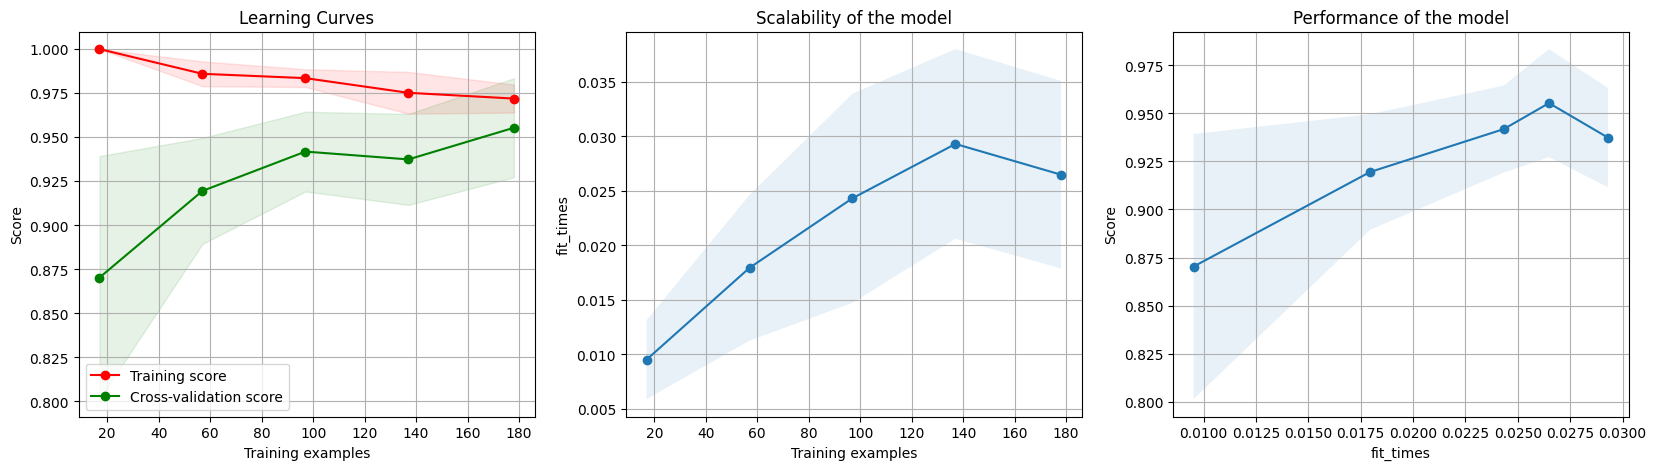

In [48]:
plot_learning_curve(best_classifier_2, 'Learning Curves',
                    X_train_features, y_train, n_jobs=-1)

In [49]:
def final_pipeline(pipeline,text):
    features, feature_names = featurizer.fit_transform(text)
    predictions = pipeline.predict(features)
    return predictions
y_test_pred = final_pipeline(best_classifier_2,X_test)

In [50]:
import sklearn.metrics as metrics
print('\nTest set classification report:\n\n',
      metrics.classification_report(y_test, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.50      0.67         6

    accuracy                           0.95        56
   macro avg       0.97      0.75      0.82        56
weighted avg       0.95      0.95      0.94        56

